In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
X_df = pd.read_csv("vec_emb.csv",header=None)

In [30]:
X_data = X_df.iloc[:,1:]
INDICES = X_df.iloc[:,0].to_numpy().astype(np.int64)

# Visualizacion de datos

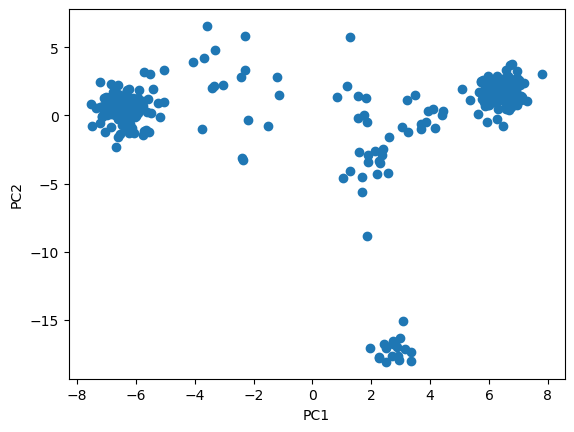

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizamos features
X = StandardScaler().fit_transform(X_data)

# Visualizamos con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Cluster

In [32]:
from sklearn.cluster import KMeans

c:\Users\tatan\anaconda3\envs\mineria\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tatan\anaconda3\envs\mineria\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tatan\anaconda3\envs\mineria\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tatan\anaconda3\envs\mineria\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

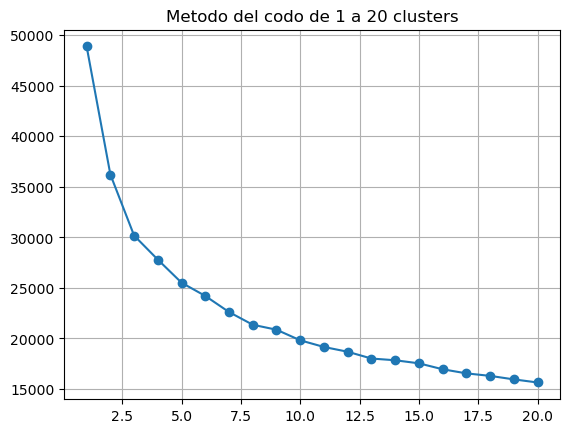

In [33]:
sse = []

clusters = list(range(1, 21))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters")
plt.grid(True)
plt.show()

c:\Users\tatan\anaconda3\envs\mineria\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


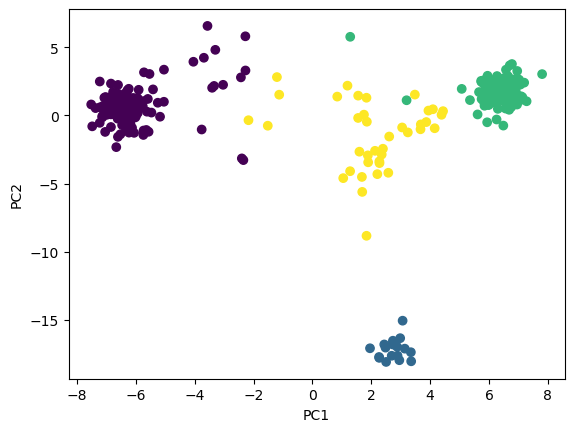

In [34]:
kmeans = KMeans(n_clusters=4, n_init=5)
kmeans.fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Exportar cluster

In [35]:
# IMPORTAMOS EL DF PARA OBTENER LA CANTIDAD DE FILAS
import os
df_path = os.getcwd() + "\\DATA\\parsed_data_public.parquet"
df_raw = pd.read_parquet(df_path)
N_df = df_raw.shape[0]

cluster_export= (-1) *np.ones(N_df,dtype=int)

# CLUSTER, poner el cluster final que ocuparemos para el analisis
f_cluster = kmeans.labels_.copy()
n_clu = len(f_cluster)

for i in range(n_clu):
    cluster_export[INDICES[i]] = f_cluster[i]

# Crear y escribir el archivo
with open("cluster.txt", "w") as archivo:
    archivo.writelines([str(item) + "\n" for item in cluster_export])

    
        
        